In [ ]:
import pandas as pd

# Load the dataset
file_path = './HR_Analytics.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1     

In [ ]:
# Select the relevant columns
data_selected = data[['DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'AgeGroup']]

# Convert MonthlyIncome to numeric (currently it is likely object type)
data_selected['MonthlyIncome'] = pd.to_numeric(data_selected['MonthlyIncome'], errors='coerce')

# Check for missing values
print(data_selected.isnull().sum())

# Drop rows with missing values
data_selected.dropna(inplace=True)

# Convert AgeGroup to binary categories
data_selected['AgeGroup'] = data_selected['AgeGroup'].apply(lambda x: 1 if x == '18-25' else 0)

# Features and target variable for classification
X = data_selected[['DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']]
y = data_selected['AgeGroup']


DistanceFromHome    0
MonthlyIncome       0
YearsAtCompany      0
AgeGroup            0
dtype: int64


<ipython-input-27-97fda2ddf2b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['MonthlyIncome'] = pd.to_numeric(data_selected['MonthlyIncome'], errors='coerce')
<ipython-input-27-97fda2ddf2b8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected.dropna(inplace=True)
<ipython-input-27-97fda2ddf2b8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, confusion_matrix

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_loss = log_loss(y_test, y_pred_prob_log_reg)
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)

print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression F1-Score: {log_reg_f1}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Loss: {log_reg_loss}")


Logistic Regression Accuracy: 0.9256756756756757
Logistic Regression F1-Score: 0.0
Logistic Regression Precision: 0.0
Logistic Regression Loss: 0.20330310531507684


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)
y_pred_prob_tree = decision_tree.predict_proba(X_test)

# Evaluate the model
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_loss = log_loss(y_test, y_pred_prob_tree)
tree_cm = confusion_matrix(y_test, y_pred_tree)

print(f"Decision Tree Accuracy: {tree_accuracy}")
print(f"Decision Tree F1-Score: {tree_f1}")
print(f"Decision Tree Precision: {tree_precision}")
print(f"Decision Tree Loss: {tree_loss}")


Decision Tree Accuracy: 0.8873873873873874
Decision Tree F1-Score: 0.2647058823529411
Decision Tree Precision: 0.2571428571428571
Decision Tree Loss: 4.058969976251932


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_loss = log_loss(y_test, y_pred_prob_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)

print(f"KNN Accuracy: {knn_accuracy}")
print(f"KNN F1-Score: {knn_f1}")
print(f"KNN Precision: {knn_precision}")
print(f"KNN Loss: {knn_loss}")


KNN Accuracy: 0.9234234234234234
KNN F1-Score: 0.05555555555555555
KNN Precision: 0.3333333333333333
KNN Loss: 1.505399945064451


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

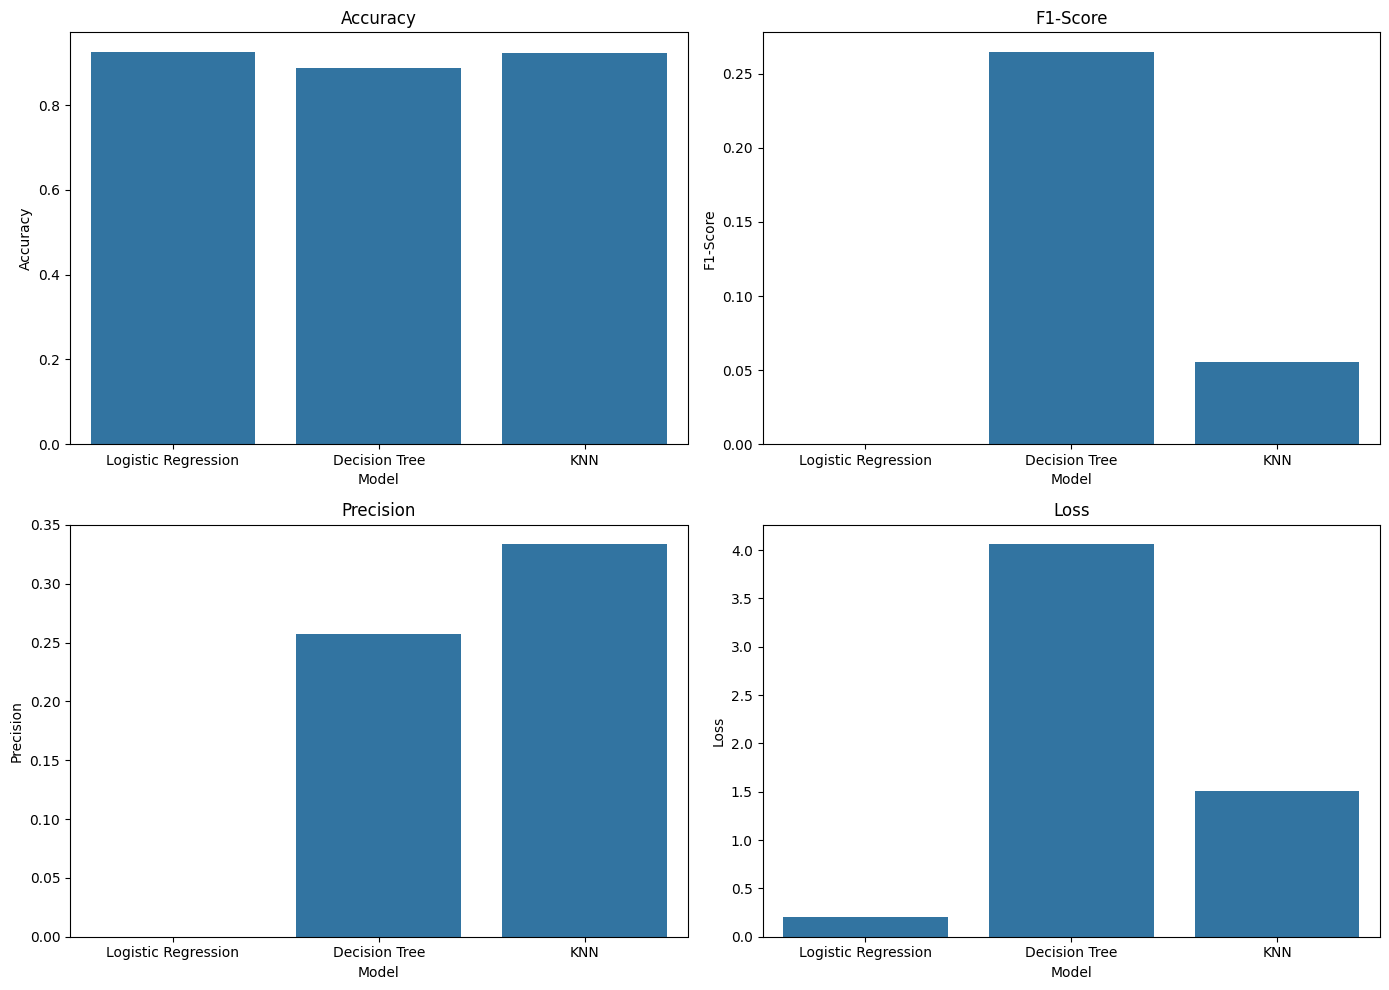

In [ ]:
# Collect the results
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN'],
    'Accuracy': [log_reg_accuracy, tree_accuracy, knn_accuracy],
    'F1-Score': [log_reg_f1, tree_f1, knn_f1],
    'Precision': [log_reg_precision, tree_precision, knn_precision],
    'Loss': [log_reg_loss, tree_loss, knn_loss]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')

sns.barplot(x='Model', y='F1-Score', data=results_df, ax=axes[0, 1])
axes[0, 1].set_title('F1-Score')

sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[1, 0])
axes[1, 0].set_title('Precision')

sns.barplot(x='Model', y='Loss', data=results_df, ax=axes[1, 1])
axes[1, 1].set_title('Loss')

plt.tight_layout()
plt.show()

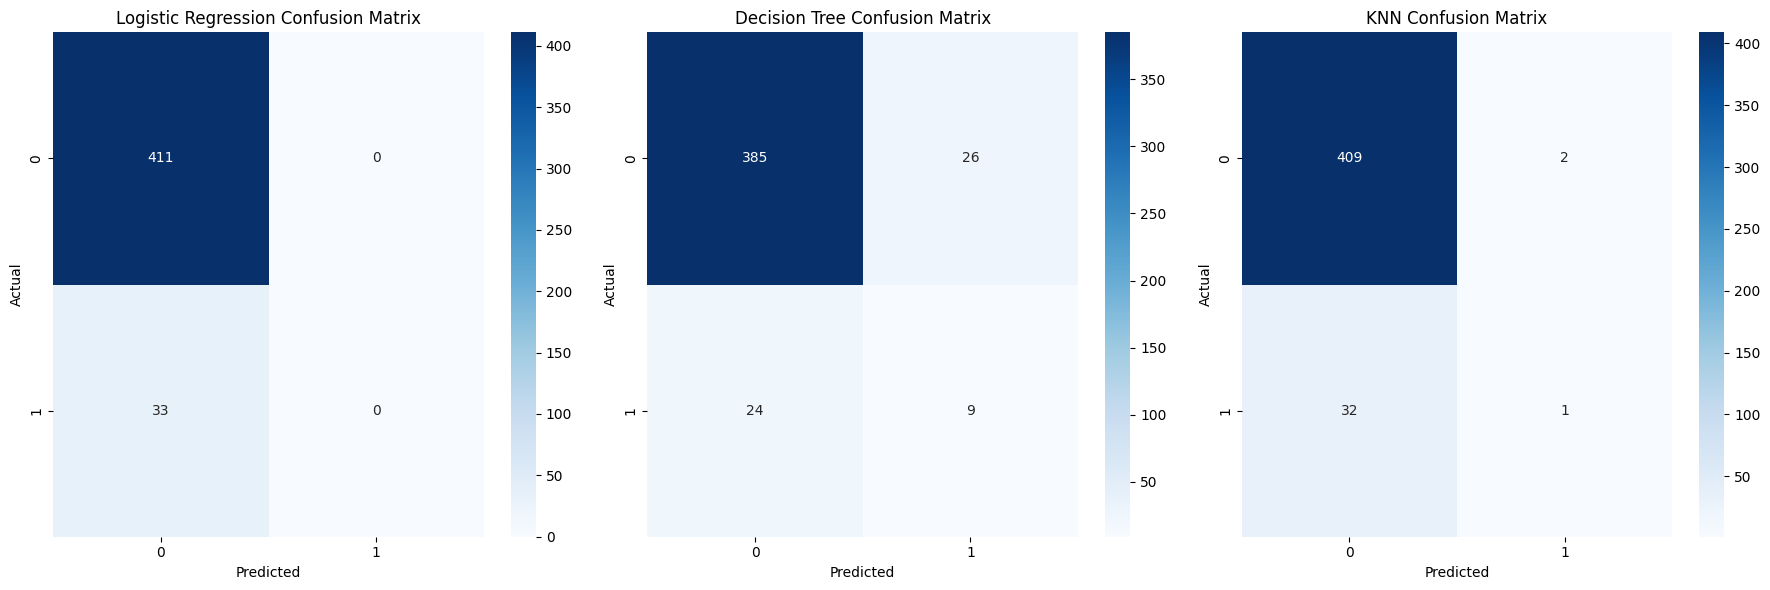

In [ ]:
# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression Confusion Matrix
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree Confusion Matrix
sns.heatmap(tree_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# KNN Confusion Matrix
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('KNN Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

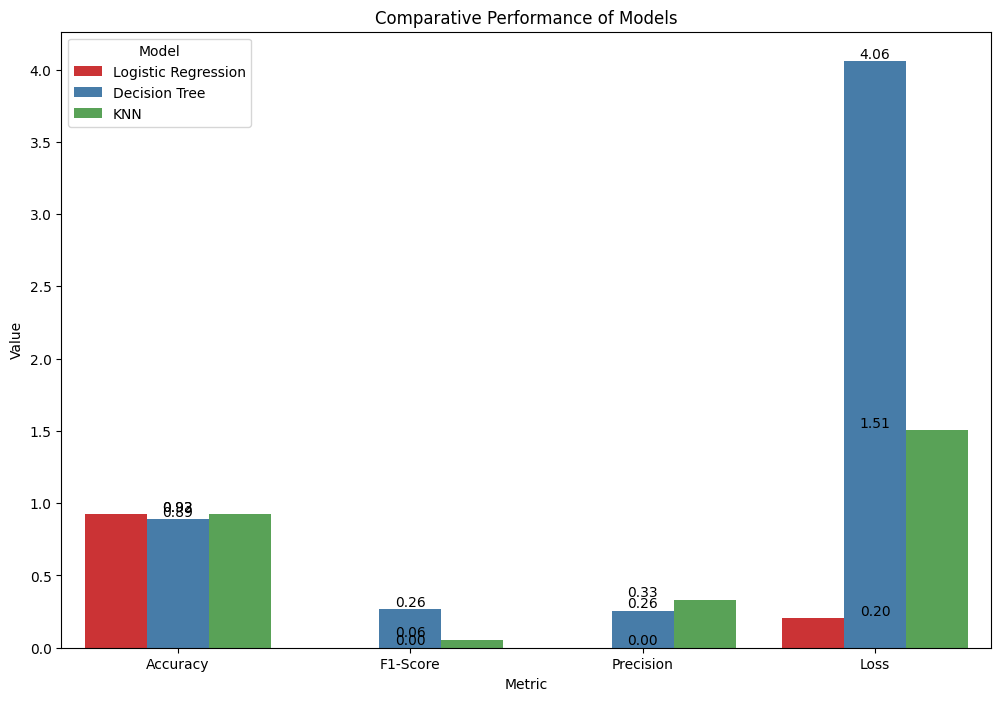

In [ ]:
# Function to plot comparative performance
def plot_comparative_performance(results):
    metrics = ['Accuracy', 'F1-Score', 'Precision', 'Loss'] # Use the correct keys from your 'results' dictionary
    models = results['Model']  # Extract models from the 'Model' key

    data = []
    for model in models:
        for metric in metrics:
            data.append([model, metric, results[metric][models.index(model)]]) # Access data correctly

    df = pd.DataFrame(data, columns=['Model', 'Metric', 'Value'])

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Metric', y='Value', hue='Model', data=df, palette='Set1')
    plt.title('Comparative Performance of Models')
    # plt.ylim(0, 1 if 'Log Loss' not in df['Metric'].values else None) # Adjust ylim if needed
    for index, row in df.iterrows():
        plt.text(index % 4, row.Value, f'{row.Value:.2f}', ha='center', va='bottom')
    plt.show()

# Call the function to plot comparative performance
plot_comparative_performance(results)